In [1]:
import sys
sys.path.insert(1, '../functions')
from gk import gk
from mwrko import mwrko
from gko import gko
from method import method
from method2 import method2
from compute_sin2 import compute_sin2
import math 

In [2]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from itertools import permutations

# Convergence Rate

#### GK

$$||x_k - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{m} \right) ^k ||x_0 - x^*||^2$$ or
$$||x_k - x^*||^2 \leq \Pi^{k-1}_{j = 0} \left ( 1 - \frac{\sigma^2_\min (A)}{\gamma_{k+1}} \right) ||x_0 - x^*||^2$$ where $\gamma_{k+1} = \frac{||Ax_{k+1}-b||^2}{||Ax_{k+1}-b||^2_{\infty}}$. In this experiment, we are using first convergence rate for GK.

#### GKO and MWRKO

For k = 1: $$||x_1 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{m} \right) ||x_0 - x^*||^2$$

For k = 2: $$||x_2 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{ ( \max_i \sin^2\theta_i )(m-1)} \right)||x_1 - x^*||^2$$

For k > 2:

**GKO:** $$||x_{k+1} - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{\max_i \sin^2\theta_i} \right)||x_k - x^*||^2$$

**MWRKO:** $$||x_2 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{ ( \max_i \sin^2\theta_i )(m-2)} \right) ||x_k - x^*||^2$$

## Gaussian System

In [3]:
# setting up data
A = np.random.randn(5000,500)
A = normalize(A, axis=1, norm='l2')
m,n = A.shape
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [4]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [5]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [6]:
# Run algorithms
gk_gaussian = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gaussian = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gaussian = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

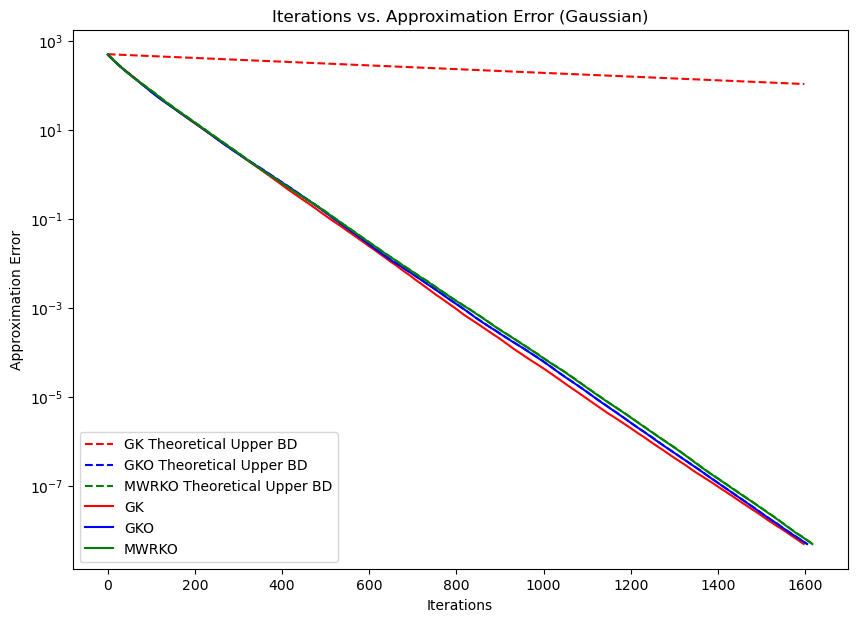

In [7]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gaussian[2])), gk_gaussian[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gaussian[2])), gko_gaussian[2], linestyle = 'dashed', 
            color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gaussian[2])), mwrko_gaussian[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gaussian[0] - 1), gk_gaussian[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gaussian[0] - 1), gko_gaussian[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gaussian[0] - 1), mwrko_gaussian[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian)')
plt.legend()

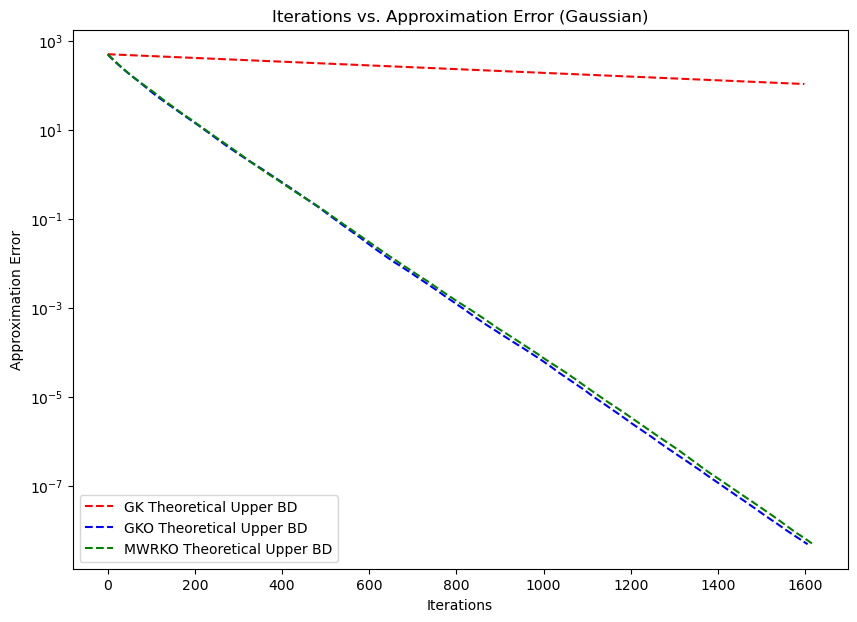

In [59]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gaussian[2])), gk_gaussian[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gaussian[2])), gko_gaussian[2], linestyle = 'dashed', 
            color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gaussian[2])), mwrko_gaussian[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')

# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian)')
plt.legend()

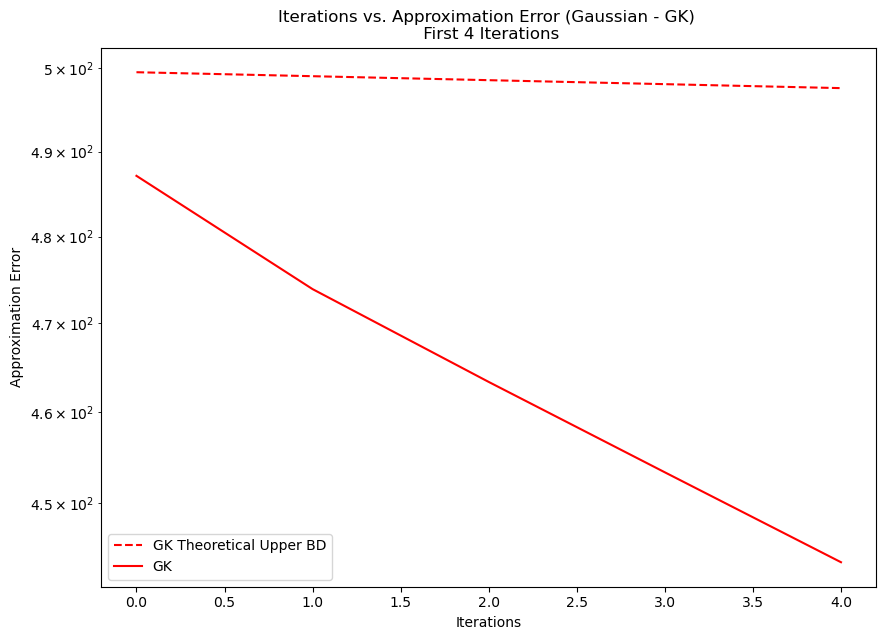

In [8]:
# Show GK empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gk_gaussian[2][0:5], linestyle = 'dashed', 
             color = "red", label = 'GK Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gk_gaussian[1][0:5], linestyle = 'solid', 
             color = "red", label = 'GK')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - GK) \n First 4 Iterations')
plt.legend()

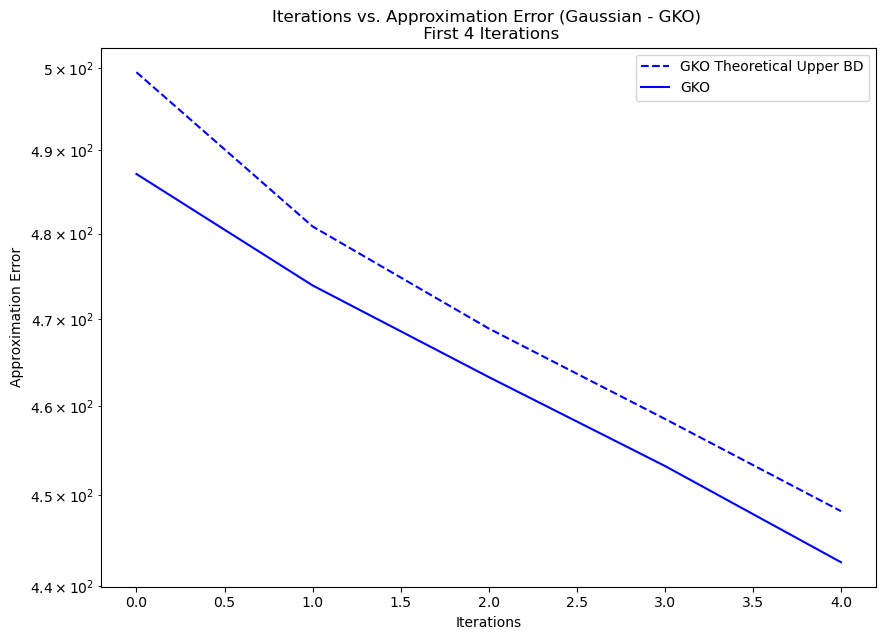

In [9]:
# Show GKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), gko_gaussian[2][0:5], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), gko_gaussian[1][0:5], linestyle = 'solid', 
             color = "blue", label = 'GKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - GKO) \n First 4 Iterations')
plt.legend()

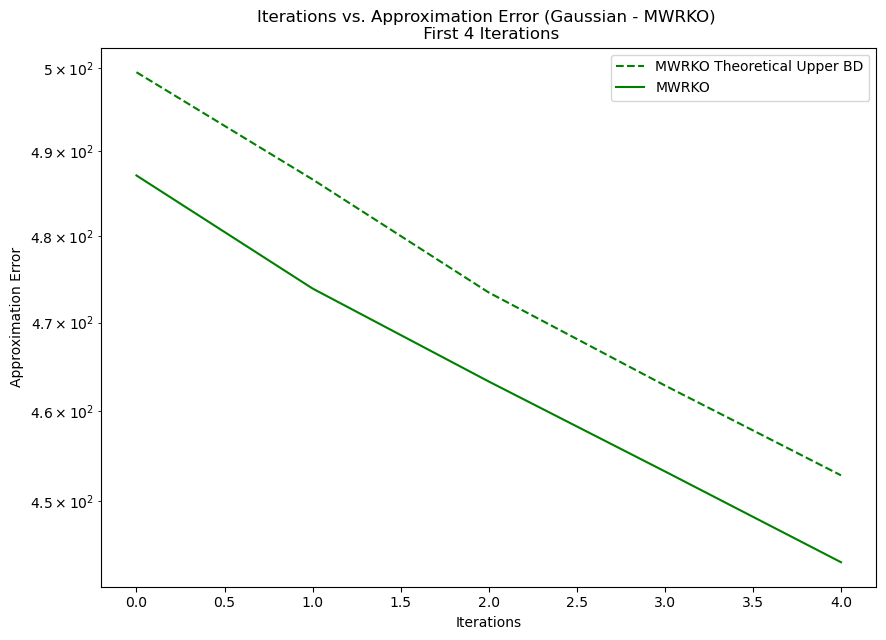

In [10]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gaussian[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gaussian[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - MWRKO) \n First 4 Iterations')
plt.legend()

In [11]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gaussian[0]-9), mwrko_gaussian[0]+1)))
# empirical result data
e_result = list(mwrko_gaussian[1][0:10])
e_result.extend(list(mwrko_gaussian[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gaussian[2][0:10])
t_result.extend(list(mwrko_gaussian[2][-11:-1]))
# create and print df
mwrko_gauss_df = pd.DataFrame()
mwrko_gauss_df['k'] = k
mwrko_gauss_df['Theoretical BD'] = t_result
mwrko_gauss_df['Empirical Results'] = e_result
mwrko_gauss_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.610000e+03,1.611000e+03,1.612000e+03,1.613000e+03,1.614000e+03,1.615000e+03,1.616000e+03,1.617000e+03,1.618000e+03,1.619000e+03
Theoretical BD,499.518171,486.655971,473.449476,462.861741,452.847621,442.946817,433.345804,424.229469,414.619771,405.607266,5.890855e-09,5.806177e-09,5.718286e-09,5.635136e-09,5.547169e-09,5.439785e-09,5.351198e-09,5.267372e-09,5.183576e-09,5.101233e-09
Empirical Results,487.125487,473.906342,463.308390,453.284607,443.374249,433.763971,424.638840,415.019868,405.998666,397.729060,5.811780e-09,5.723804e-09,5.640573e-09,5.552522e-09,5.445035e-09,5.356361e-09,5.272455e-09,5.188578e-09,5.106155e-09,5.019507e-09


## Uniform System

In [19]:
# setting up data
A = np.random.uniform(size =(5000,500), low = 0, high = 1)
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [20]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [21]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [22]:
# Run algorithms
gk_uniform = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_uniform = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_uniform = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

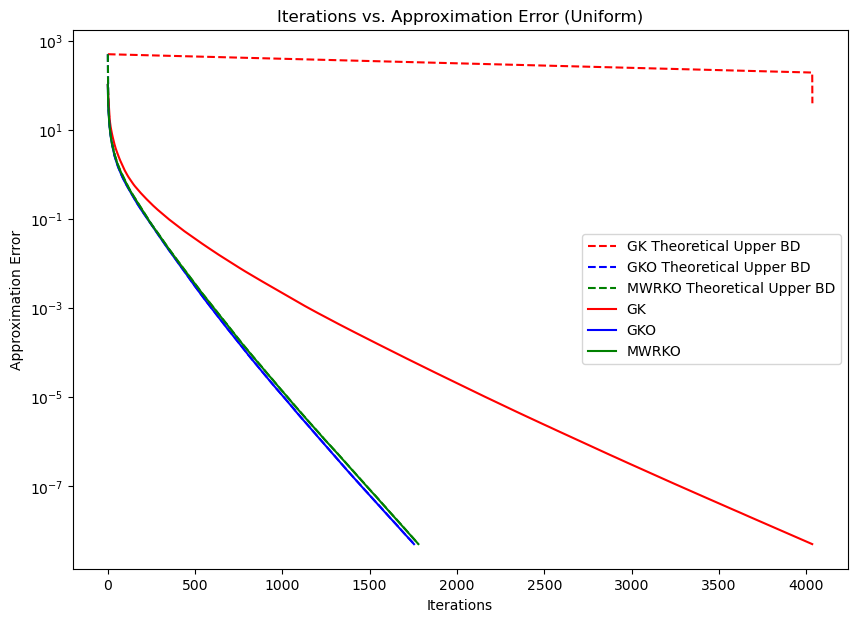

In [23]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_uniform[2])), gk_uniform[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_uniform[2])), gko_uniform[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_uniform[2])), mwrko_uniform[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_uniform[0] - 1), gk_uniform[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_uniform[0] - 1), gko_uniform[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_uniform[0] - 1), mwrko_uniform[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform)')
plt.legend()

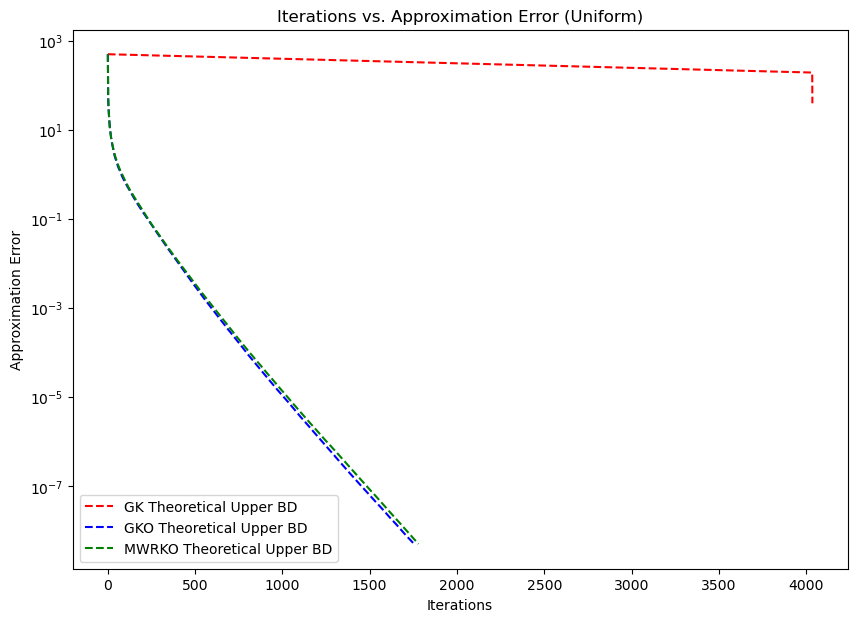

In [54]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_uniform[2])), gk_uniform[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_uniform[2])), gko_uniform[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_uniform[2])), mwrko_uniform[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform)')
plt.legend()

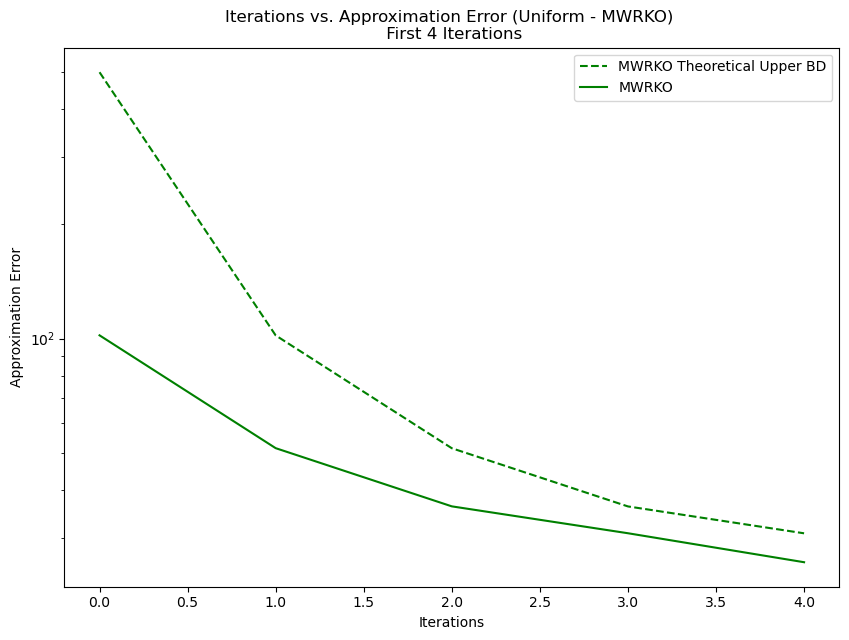

In [24]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_uniform[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_uniform[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform - MWRKO) \n First 4 Iterations')
plt.legend()

In [25]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_uniform[0]-9), mwrko_uniform[0]+1)))
# empirical result data
e_result = list(mwrko_uniform[1][0:10])
e_result.extend(list(mwrko_uniform[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_uniform[2][0:10])
t_result.extend(list(mwrko_uniform[2][-11:-1]))
# create and print df
mwrko_uniform_df = pd.DataFrame()
mwrko_uniform_df['k'] = k
mwrko_uniform_df['Theoretical BD'] = t_result
mwrko_uniform_df['Empirical Results'] = e_result
mwrko_uniform_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.00000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.772000e+03,1.773000e+03,1.774000e+03,1.775000e+03,1.776000e+03,1.777000e+03,1.778000e+03,1.779000e+03,1.780000e+03,1.781000e+03
Theoretical BD,499.882609,101.944994,51.56236,36.279155,30.840725,25.887059,20.912973,19.258613,17.000036,14.996754,5.563823e-09,5.509385e-09,5.461069e-09,5.410103e-09,5.354944e-09,5.302159e-09,5.246876e-09,5.195230e-09,5.140227e-09,5.089664e-09
Empirical Results,101.988159,51.584197,36.29452,30.853786,25.898023,20.921829,19.266769,17.007236,15.003105,13.376291,5.511719e-09,5.463382e-09,5.412394e-09,5.357212e-09,5.304404e-09,5.249098e-09,5.197430e-09,5.142404e-09,5.091820e-09,5.039617e-09


## 50/50 Gauss-Uniform System

In [26]:
# setting up data
A1 = np.random.rand(2500,500)
A2 = np.random.randn(2500,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [27]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [28]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [29]:
# Run algorithms
gk_gu1 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu1 = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu1 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

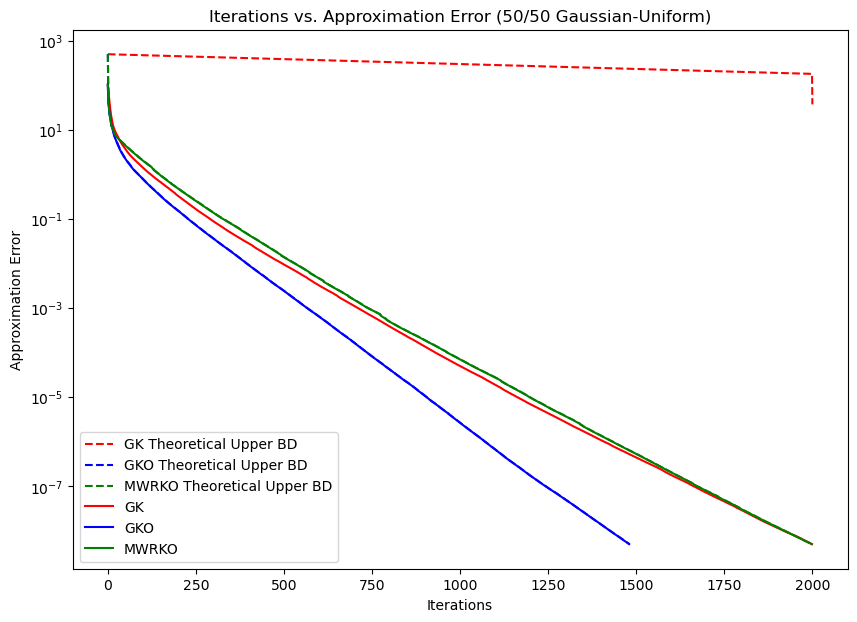

In [30]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu1[2])), gk_gu1[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu1[2])), gko_gu1[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu1[2])), mwrko_gu1[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gu1[0] - 1), gk_gu1[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gu1[0] - 1), gko_gu1[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gu1[0] - 1), mwrko_gu1[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gaussian-Uniform)')
plt.legend()

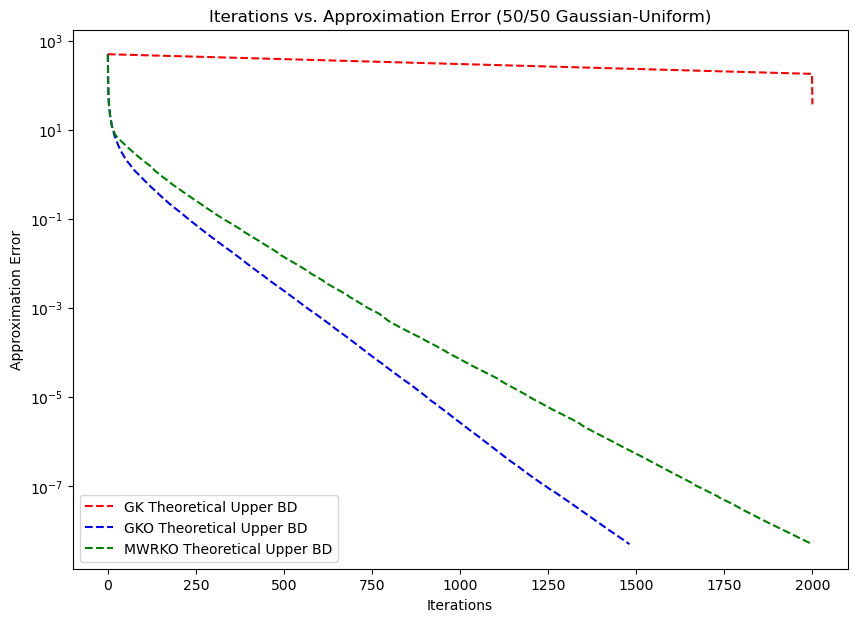

In [55]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu1[2])), gk_gu1[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu1[2])), gko_gu1[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu1[2])), mwrko_gu1[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gaussian-Uniform)')
plt.legend()

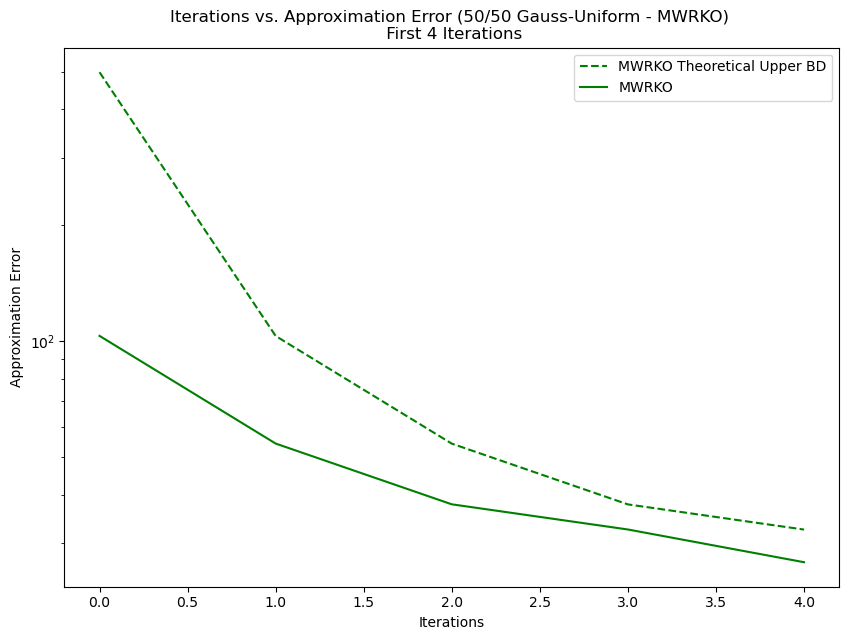

In [31]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu1[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu1[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gauss-Uniform - MWRKO) \n First 4 Iterations')
plt.legend()

In [32]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu1[0]-9), mwrko_gu1[0]+1)))
# empirical result data
e_result = list(mwrko_gu1[1][0:10])
e_result.extend(list(mwrko_gu1[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu1[2][0:10])
t_result.extend(list(mwrko_gu1[2][-11:-1]))
# create and print df
mwrko_gu1_df = pd.DataFrame()
mwrko_gu1_df['k'] = k
mwrko_gu1_df['Theoretical BD'] = t_result
mwrko_gu1_df['Empirical Results'] = e_result
mwrko_gu1_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03
Theoretical BD,499.746044,103.256259,54.243616,37.722466,32.450328,26.683614,21.574450,19.746447,17.880043,15.987151,5.485482e-09,5.435507e-09,5.388001e-09,5.338750e-09,5.291764e-09,5.245030e-09,5.194966e-09,5.150135e-09,5.109103e-09,5.071668e-09
Empirical Results,103.308742,54.271192,37.741643,32.466825,26.697179,21.585418,19.756485,17.889133,15.995279,14.084086,5.438270e-09,5.390740e-09,5.341464e-09,5.294454e-09,5.247696e-09,5.197607e-09,5.152753e-09,5.111700e-09,5.074247e-09,5.033782e-09


## 75/25 Gauss-Uniform System

In [33]:
# setting up data
A1 = np.random.rand(1250,500)
A2 = np.random.randn(3750,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [34]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [35]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [36]:
# Run algorithms
gk_gu2 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu2 = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu2 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

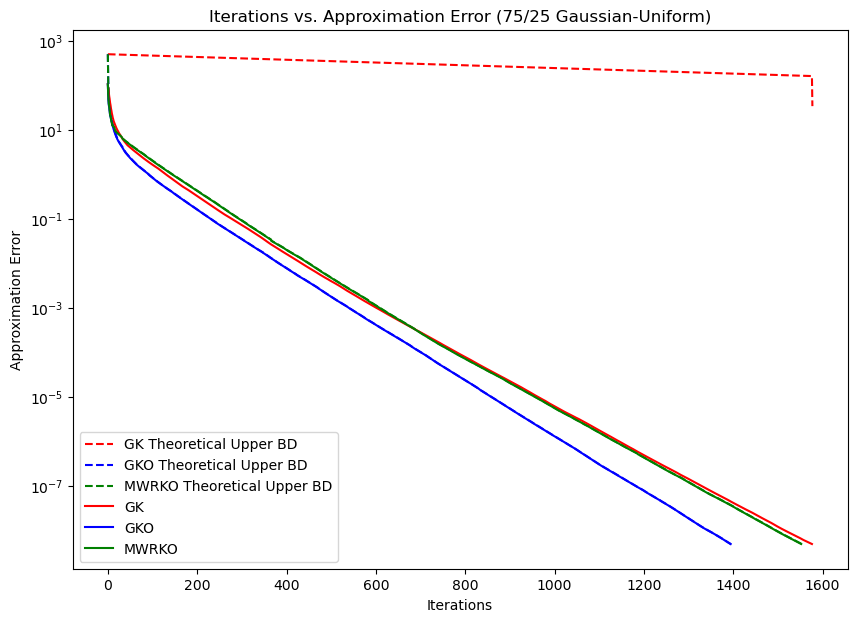

In [37]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu2[2])), gk_gu2[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu2[2])), gko_gu2[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu2[2])), mwrko_gu2[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gu2[0] - 1), gk_gu2[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gu2[0] - 1), gko_gu2[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gu2[0] - 1), mwrko_gu2[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gaussian-Uniform)')
plt.legend()

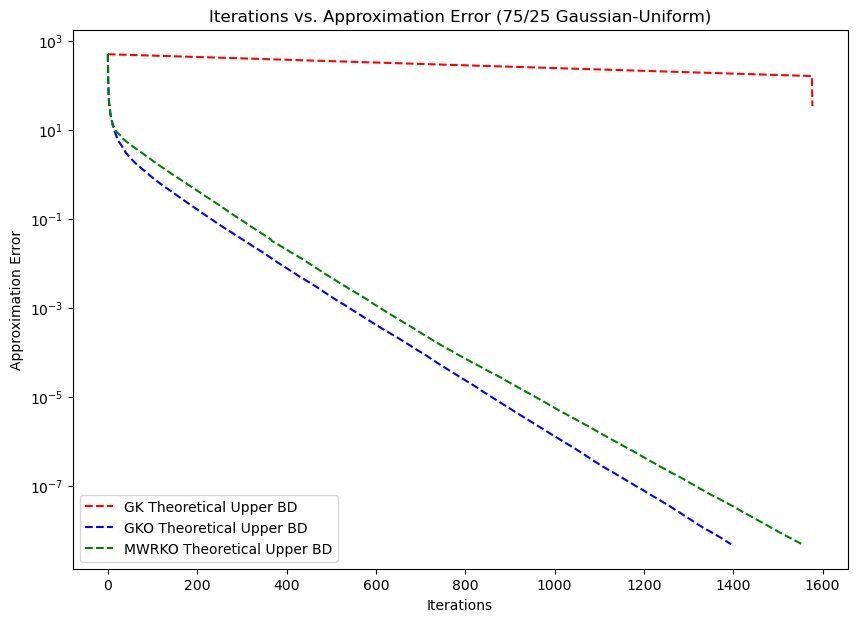

In [56]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu2[2])), gk_gu2[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu2[2])), gko_gu2[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu2[2])), mwrko_gu2[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gaussian-Uniform)')
plt.legend()

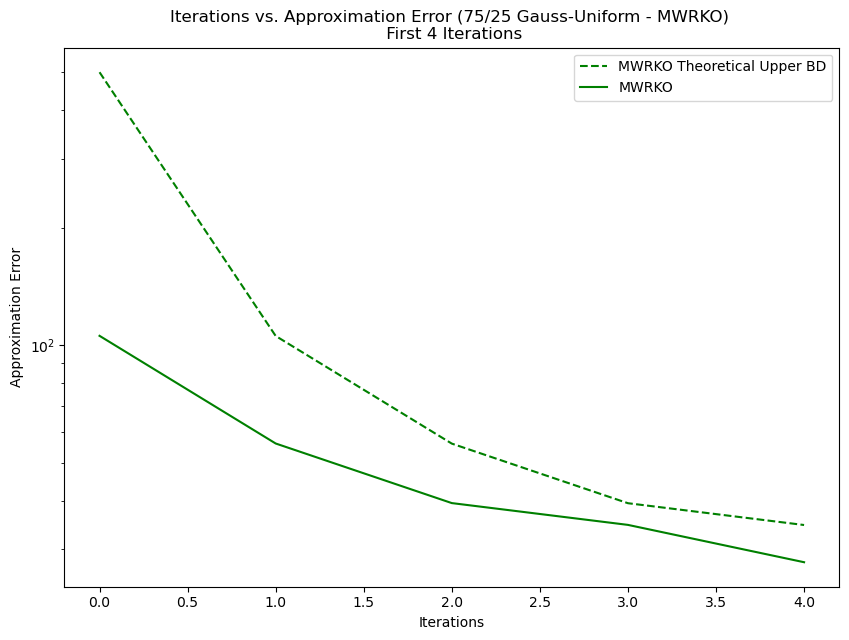

In [38]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu2[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu2[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gauss-Uniform - MWRKO) \n First 4 Iterations')
plt.legend()

In [39]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu2[0]-9), mwrko_gu2[0]+1)))
# empirical result data
e_result = list(mwrko_gu2[1][0:10])
e_result.extend(list(mwrko_gu2[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu2[2][0:10])
t_result.extend(list(mwrko_gu2[2][-11:-1]))
# create and print df
mwrko_gu2_df = pd.DataFrame()
mwrko_gu2_df['k'] = k
mwrko_gu2_df['Theoretical BD'] = t_result
mwrko_gu2_df['Empirical Results'] = e_result
mwrko_gu2_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.545000e+03,1.546000e+03,1.547000e+03,1.548000e+03,1.549000e+03,1.550000e+03,1.551000e+03,1.552000e+03,1.553000e+03,1.554000e+03
Theoretical BD,499.641908,105.533394,55.939836,39.366064,34.618077,27.778792,21.993485,20.174555,17.462281,15.428647,5.684360e-09,5.615878e-09,5.551863e-09,5.488927e-09,5.423775e-09,5.360099e-09,5.293455e-09,5.235372e-09,5.172346e-09,5.113171e-09
Empirical Results,105.609045,55.979944,39.394289,34.642898,27.798709,22.009254,20.189020,17.474801,15.439709,14.265408,5.619905e-09,5.555843e-09,5.492862e-09,5.427664e-09,5.363942e-09,5.297250e-09,5.239125e-09,5.176054e-09,5.116837e-09,5.056282e-09


## 25/75 Gauss-Uniform System

In [40]:
# setting up data
A1 = np.random.rand(3750,500)
A2 = np.random.randn(1250,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [41]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [42]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [43]:
# Run algorithms
gk_gu3 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu3 = method2(A,x,y,'GKO', LHk_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu3 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

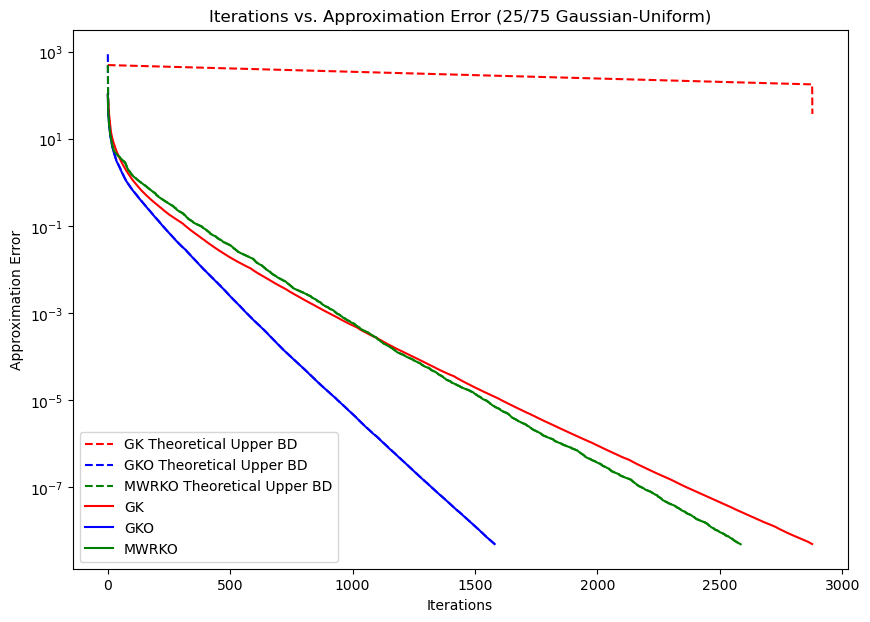

In [44]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu3[2])), gk_gu3[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu3[2])), gko_gu3[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu3[2])), mwrko_gu3[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gu3[0] - 1), gk_gu3[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gu3[0] - 1), gko_gu3[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gu3[0] - 1), mwrko_gu3[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gaussian-Uniform)')
plt.legend()

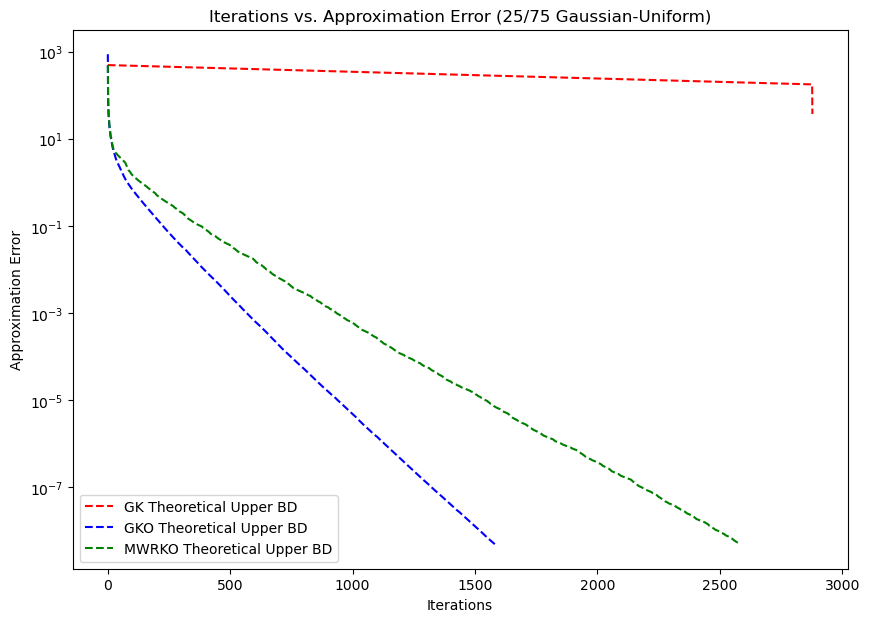

In [57]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu3[2])), gk_gu3[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu3[2])), gko_gu3[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu3[2])), mwrko_gu3[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gaussian-Uniform)')
plt.legend()

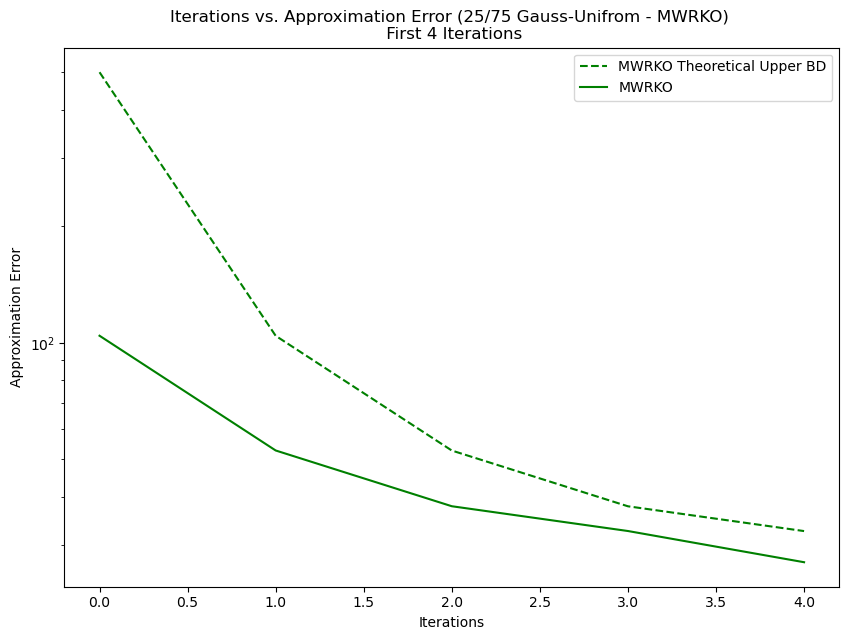

In [45]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu3[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu3[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gauss-Unifrom - MWRKO) \n First 4 Iterations')
plt.legend()

In [46]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu3[0]-9), mwrko_gu3[0]+1)))
# empirical result data
e_result = list(mwrko_gu3[1][0:10])
e_result.extend(list(mwrko_gu3[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu3[2][0:10])
t_result.extend(list(mwrko_gu3[2][-11:-1]))
# create and print df
mwrko_gu3_df = pd.DataFrame()
mwrko_gu3_df['k'] = k
mwrko_gu3_df['Theoretical BD'] = t_result
mwrko_gu3_df['Empirical Results'] = e_result
mwrko_gu3_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,2.578000e+03,2.579000e+03,2.580000e+03,2.581000e+03,2.582000e+03,2.583000e+03,2.584000e+03,2.585000e+03,2.586000e+03,2.587000e+03
Theoretical BD,499.822529,104.234712,52.682417,37.814116,32.631264,27.104381,21.845703,19.823671,17.607698,15.240737,5.291158e-09,5.254344e-09,5.225672e-09,5.196792e-09,5.168993e-09,5.142344e-09,5.116737e-09,5.089962e-09,5.060167e-09,5.032076e-09
Empirical Results,104.271730,52.701130,37.827548,32.642855,27.114008,21.853463,19.830712,17.613952,15.246150,13.686071,5.256211e-09,5.227528e-09,5.198638e-09,5.170829e-09,5.144170e-09,5.118555e-09,5.091770e-09,5.061965e-09,5.033864e-09,5.005282e-09


## Two Highly Correlated Systems

In [47]:
# setting up data
# Step 1: generate two gaussian linear system
A = np.random.randn(2,500)
A1 = np.reshape(A[0,:], (1, 500))
A2 = np.reshape(A[1,:], (1, 500))
# Step 2: generate correalted systems
U = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A1 =  np.tile(A1, (2500, 1)) +  U
A2 =  np.tile(A2, (2500, 1)) +  U
# Step 3: Combine two correlated systems
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [48]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [49]:
# Run algorithms
gk_corr = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_corr = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_corr = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

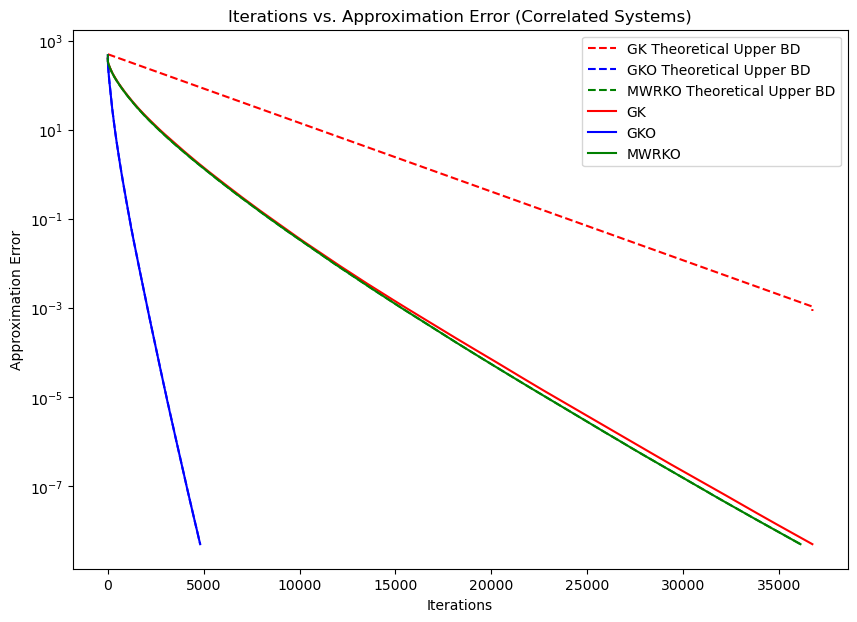

In [50]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_corr[2])), gk_corr[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_corr[2])), gko_corr[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_corr[2])), mwrko_corr[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_corr[0] - 1), gk_corr[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_corr[0] - 1), gko_corr[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_corr[0] - 1), mwrko_corr[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems)')
plt.legend()

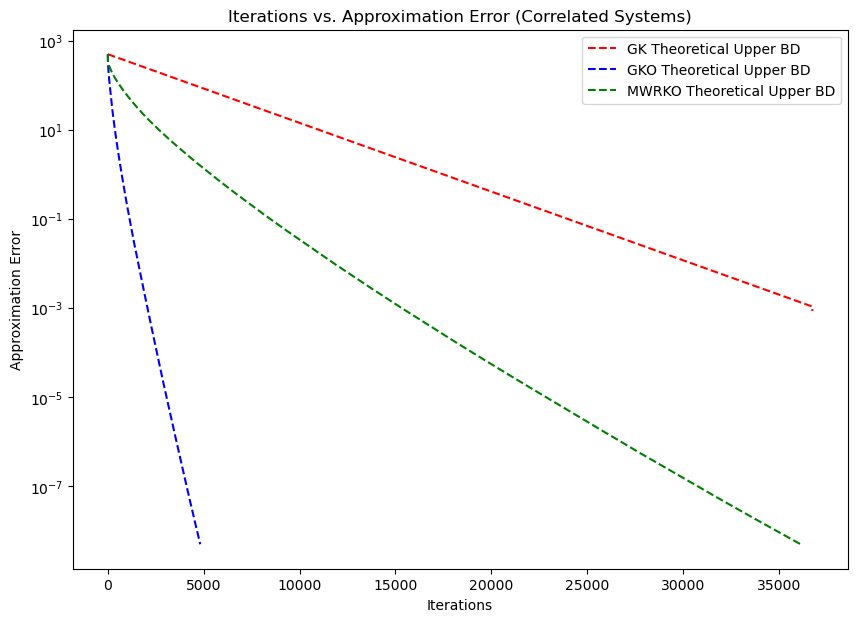

In [58]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_corr[2])), gk_corr[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_corr[2])), gko_corr[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_corr[2])), mwrko_corr[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems)')
plt.legend()

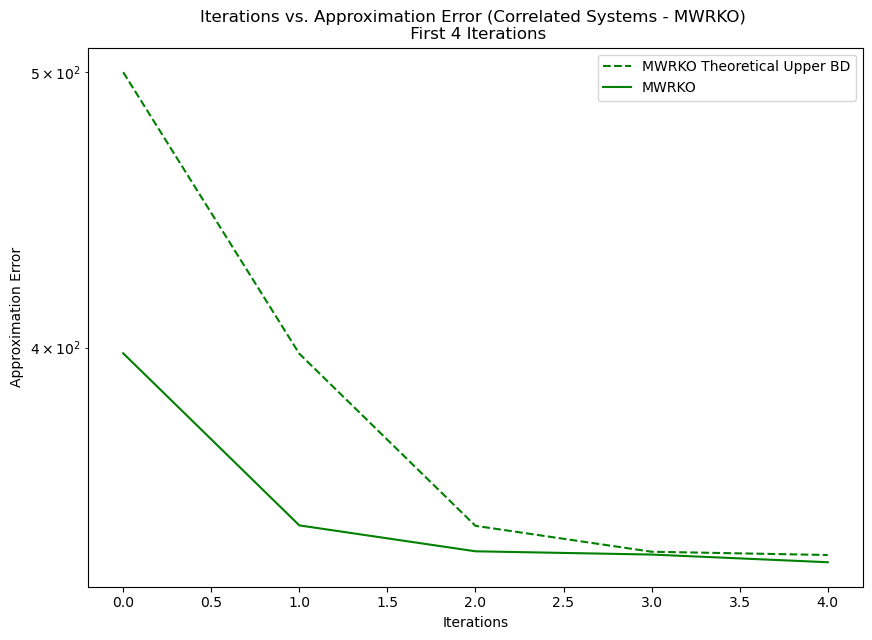

In [51]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_corr[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_corr[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems - MWRKO) \n First 4 Iterations')
plt.legend()

In [52]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_corr[0]-9), mwrko_corr[0]+1)))
# empirical result data
e_result = list(mwrko_corr[1][0:10])
e_result.extend(list(mwrko_corr[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_corr[2][0:10])
t_result.extend(list(mwrko_corr[2][-11:-1]))
# create and print df
mwrko_corr_df = pd.DataFrame()
mwrko_corr_df['k'] = k
mwrko_corr_df['Theoretical BD'] = t_result
mwrko_corr_df['Empirical Results'] = e_result
mwrko_corr_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,3.612200e+04,3.612300e+04,3.612400e+04,3.612500e+04,3.612600e+04,3.612700e+04,3.612800e+04,3.612900e+04,3.613000e+04,3.613100e+04
Theoretical BD,499.822529,398.003692,346.269509,339.089060,338.194643,336.103719,334.264907,332.672788,331.099623,329.575073,5.027471e-09,5.024693e-09,5.021940e-09,5.019189e-09,5.016436e-09,5.013674e-09,5.010919e-09,5.008166e-09,5.005406e-09,5.002673e-09
Empirical Results,398.145039,346.392508,339.209508,338.314773,336.223106,334.383641,332.790957,331.217233,329.692141,328.217558,5.026478e-09,5.023724e-09,5.020972e-09,5.018218e-09,5.015455e-09,5.012699e-09,5.009944e-09,5.007184e-09,5.004450e-09,5.001686e-09
